### CA3 @ EPS Course
### Discrete-Probability Modeling & Simulation of a Café Queue
#### Instructors: Dr. Bahrak, Dr. Vahabie
##### Supervisors: Mohammad Amanlou, Mostafa Kermaninia
##### TA: Maryam Vali
---

*Full Name: Mohammad mahdi Jadidi*

*SID:810103382*

---

## Warm-Up with Banach's match problem

In **Banach’s match problem**, we have two matchboxes, each initially containing $ n $ matches.  
At each step, one of the boxes is chosen **at random** (with equal probability $ \tfrac{1}{2} $), and one match is taken from it.  
The process continues until one of the boxes becomes empty.

---

### State Definition

A **state** of the system can be defined as the pair  
$$
S_t = (x_1, x_2)
$$
where $ x_1 $ and $ x_2 $ are the remaining numbers of matches in box 1 and box 2 after $ t $ draws.

At each step, the system transitions to a new state by reducing one of the coordinates by 1:

$$
S_{t+1} =
\begin{cases}
(x_1 - 1,\, x_2) & \text{with probability } \tfrac{1}{2},\\[6pt]
(x_1,\, x_2 - 1) & \text{with probability } \tfrac{1}{2}.
\end{cases}
$$

---

### Markov Property

The probability of being in a certain state depends **only on the immediately previous state**, not on the full history of the process:

$$
P(S_{t+1} \mid S_t, S_{t-1}, \dots, S_0) = P(S_{t+1} \mid S_t).
$$

Thus, the process forms a **discrete-time Markov chain** on the grid of possible $(x_1, x_2)$ values.

---

### Problem Statement

> Given two boxes each containing $ n $ matches, at each step one box is chosen at random and one match is removed.  
> Find the probability that when one box becomes empty for the first time, the other box still contains exactly $ k $ matches, using the below approaches:

---

#### 1. Analytical Approach

It can be shown that the exact probability is:

$$
P(K = k) = \frac{\binom{2n - k}{n}}{2^{\,2n - k}}, \qquad k = 0, 1, \dots, n.
$$

This result is obtained by counting all possible random sequences of box selections that lead to one box being emptied when the other has $ k $ matches left.

---

#### 2. Simulation Approach

Alternatively, the process can be simulated to approximate the same probability distribution.  
At each step:

1. Randomly select one of the two boxes.
2. Remove one match from the chosen box.
3. Stop when one box becomes empty.
4. Record how many matches remain in the other box.

Repeating this experiment many times provides an empirical estimate of $ P(K = k) $.



  k analytical simulated
  0   0.176197   0.00000
  1   0.185471   0.18690
  2   0.185471   0.18661
  3   0.174561   0.17449
  4   0.152740   0.15081
  5   0.122192   0.12143
  6   0.087280   0.08829
  7   0.053711   0.05328
  8   0.026855   0.02694
  9   0.009766   0.00956
 10   0.001953   0.00169


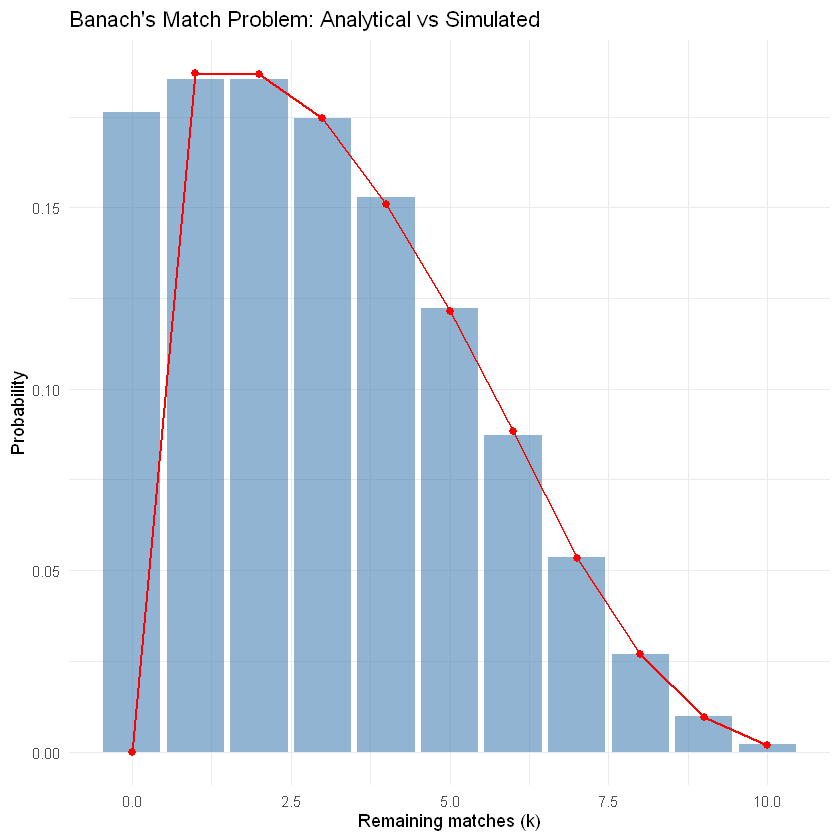

In [7]:
# Analytical probability function
banach_prob <- function(n) {
  k <- 0:n
  # p <- ## TODO
  p <- choose(2 * n - k - 1, n - 1) / 2^(2 * n - k - 1)
  data.frame(k = k, analytical = p)
}

# Simulation function
simulate_banach <- function(n) {
  box1 <- n
  box2 <- n
  while (box1 > 0 && box2 > 0) {
    ## TODO
    if (runif(1) < 0.5) {
      box1 <- box1 - 1
    } else {
      box2 <- box2 - 1
    }
  }
  return(max(box1, box2))
}

# Parameters
n <- 10
N <- 100000

set.seed(2025)
results <- replicate(N, simulate_banach(n))
sim_df <- as.data.frame(table(results))
colnames(sim_df) <- c("k", "simulated")
sim_df$k <- as.numeric(as.character(sim_df$k))
sim_df$simulated <- sim_df$simulated / sum(sim_df$simulated)

# Analytical results
ana_df <- banach_prob(n)

# Merge for comparison
compare <- merge(ana_df, sim_df, by = "k", all.x = TRUE)
compare[is.na(compare)] <- 0

# Print comparison table
print(compare, digits = 4, row.names = FALSE)

# Optional: visualize comparison
library(ggplot2)
ggplot(compare, aes(x = k)) +
  geom_bar(aes(y = analytical), stat = "identity", fill = "steelblue", alpha = 0.6) +
  geom_point(aes(y = simulated), color = "red", size = 2) +
  geom_line(aes(y = simulated), color = "red", size = 0.8) +
  labs(title = "Banach's Match Problem: Analytical vs Simulated",
       x = "Remaining matches (k)",
       y = "Probability") +
  theme_minimal()


## Project Overview

This project develops a discrete probabilistic and simulation model for a café system where customers arrive randomly, place orders from a **7-item menu**, and wait for their orders to be prepared.

Each customer:
- Arrives following a **Poisson** distribution with rate parameter $\lambda$.
- Chooses one menu item based on a **multinomial distribution** of preferences.
- Experiences a **Geometric** preparation time depending on the selected item’s difficulty.

The café operates with two servers and may activate a third server when the queue grows beyond a threshold $T$.  
We explore queue behavior, service dynamics, long-run probabilities, and parameter sensitivities.






**Notation (use verbatim):**

- Time slot = 5 minutes.  
- $t$: discrete slot index ($t=0,1,2,\dots$).  
- $Z_t$: number of arrivals in slot $t$, $Z_t\overset{\text{iid}}{\sim}\mathrm{Poisson}(\lambda)$. ($\text{iid}$ stands for independent identically distributed)
- $\lambda$: mean arrivals per 5-minute slot (base $\lambda=0.8$).  
- $Q_t$: queue length at slot boundary after slot $t$ (customers awaiting completion). Start $Q_0=0$.  
- $s_t$: number of active servers at slot $t$ (base 2); a third server activates when $\max(Q_t-2,0)\ge h$ (activation threshold $h$).  
- $T$: service time of a single customer in slots (geometric with parameter equal to that customer's $p_i$).


**Menu (7 items) and selection probabilities (categorical / multinomial):**
- Coffee — $p_{\text{Coffee}} = 0.25$  
- Cake — $p_{\text{Cake}} = 0.15$  
- Smoothie — $p_{\text{Smoothie}} = 0.15$  
- Shake — $p_{\text{Shake}} = 0.10$  
- Sandwich — $p_{\text{Sandwich}} = 0.10$  
- Tea — $p_{\text{Tea}} = 0.15$  
- Ice\_Cream — $p_{\text{Ice_Cream}} = 0.10$

**Per-item per-slot success probabilities (service attempt success $p_i$) — geometric service model:**  
- Coffee: $p_{\text{Coffee}} = 0.40$  
- Cake: $p_{\text{Cake}} = 0.35$  
- Smoothie: $p_{\text{Smoothie}} = 0.30$  
- Shake: $p_{\text{Shake}} = 0.35$  
- Sandwich: $p_{\text{Sandwich}} = 0.25$  
- Tea: $p_{\text{Tea}} = 0.35$  
- Ice\_Cream: $p_{\text{Ice_Cream}} = 0.30$

----------------

In [8]:
install.packages(c("knitr", "ggplot2", "dplyr", "tidyr", "gridExtra", "expm", "boot"))

Warning message:
"packages 'knitr', 'ggplot2', 'dplyr', 'tidyr', 'gridExtra', 'expm', 'boot' are in use and will not be installed"


In [9]:
library(knitr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(expm)
library(boot)
library(RColorBrewer)

set.seed(2025)          # reproducible
lambda_base <- 0.8     # arrivals per 5-minute slot
slot_length_min <- 5    # minutes per slot
base_servers <- 2
activation_threshold_default <- 4  # activates third server when Q-2 >= 4

# Menu selection probabilities (q)
menu_q <- c(Coffee = 0.25,
            Cake = 0.15,
            Smoothie = 0.15,
            Shake = 0.10,
            Sandwich = 0.10,
            Tea = 0.15,
            Ice_Cream = 0.10)

# Per-item geometric per-attempt success probabilities (p_i) in one slot
menu_p <- c(Coffee = 0.40,
            Cake = 0.35,
            Smoothie = 0.30,
            Shake = 0.35,
            Sandwich = 0.25,
            Tea = 0.35,
            Ice_Cream = 0.30)

# Convenience vectors
menu_names <- names(menu_q)

# Print table for confirmation
kable(data.frame(Item = menu_names, q = as.numeric(menu_q), p = as.numeric(menu_p)),
      caption = "Menu selection probabilities q and per-attempt success probabilities p")




Table: Menu selection probabilities q and per-attempt success probabilities p

|Item      |    q|    p|
|:---------|----:|----:|
|Coffee    | 0.25| 0.40|
|Cake      | 0.15| 0.35|
|Smoothie  | 0.15| 0.30|
|Shake     | 0.10| 0.35|
|Sandwich  | 0.10| 0.25|
|Tea       | 0.15| 0.35|
|Ice_Cream | 0.10| 0.30|

**Notes**

- For an item with per-slot success probability $p_i$, the service time (in slots) $T_i$ follows a Geometric distribution on $\{1,2,\dots\}$ with
  - $P(T_i=k) = (1-p_i)^{k-1} p_i$,
  - $E[T_i] = 1/p_i$ (slots),
  - $\operatorname{Var}(T_i) = (1-p_i)/p_i^2$ (slots$^2$).
- For Poisson arrivals per slot with parameter $\lambda$, $E[Z]=\operatorname{Var}(Z)=\lambda$.
------------

## Phase 1 — Theoretical quantities & small simulations

**Tasks (Phase 1):**

1. Compute Poisson($\lambda=0.8$) PMF and CDF for $k=0:12$.  
2. Display the categorical item PMF (the $q_i$).  
3. Show Geometric PMF/CDF example for a chosen $p$ (support 1..20).  
4. Small simulation overlay: Poisson simulated histogram vs theoretical PMF.



Table: Poisson(λ=0.8) PMF and CDF (k=0..12)

|  k|      PMF|      CDF|
|--:|--------:|--------:|
|  0| 0.449329| 0.449329|
|  1| 0.359463| 0.808792|
|  2| 0.143785| 0.952577|
|  3| 0.038343| 0.990920|
|  4| 0.007669| 0.998589|
|  5| 0.001227| 0.999816|
|  6| 0.000164| 0.999979|
|  7| 0.000019| 0.999998|
|  8| 0.000002| 1.000000|
|  9| 0.000000| 1.000000|
| 10| 0.000000| 1.000000|
| 11| 0.000000| 1.000000|
| 12| 0.000000| 1.000000|

E[Z] = 0.8  Var(Z) = 0.8 




Table: Item PMF (categorical)

|Item      | Prob|
|:---------|----:|
|Coffee    | 0.25|
|Cake      | 0.15|
|Smoothie  | 0.15|
|Shake     | 0.10|
|Sandwich  | 0.10|
|Tea       | 0.15|
|Ice_Cream | 0.10|

Example: p = 0.3  => E[T] = 3.333333  Var(T) = 7.777778 


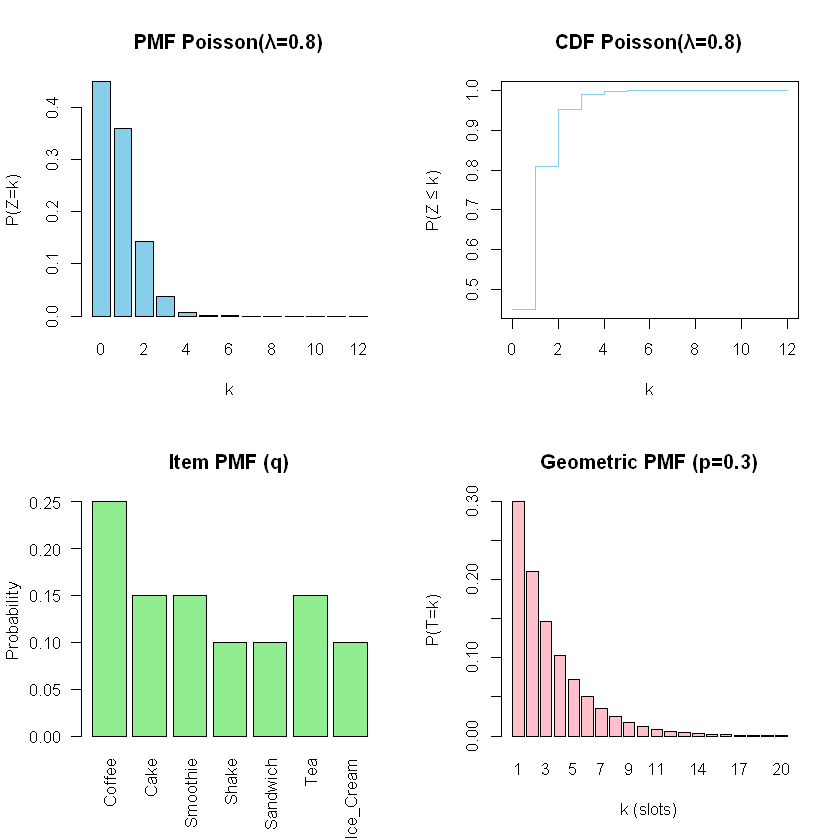

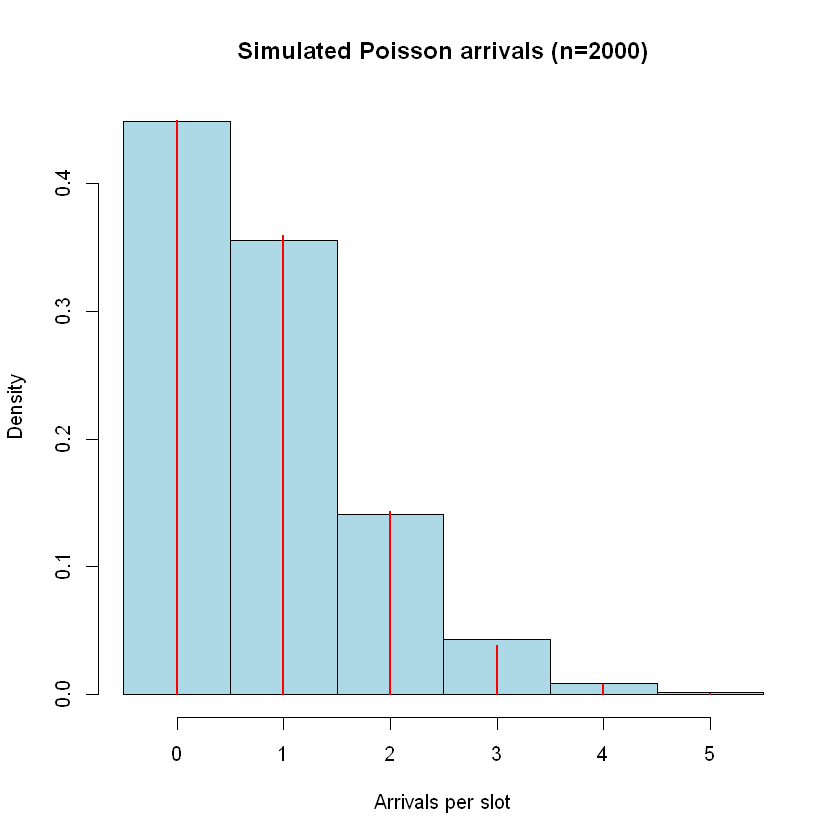

In [11]:
# Phase 1 implementation

# 1) Poisson PMF/CDF (k=0..12)
k_vals <- 0:12
# pmf_Z <- ##TODO
pmf_Z <- dpois(k_vals, lambda_base)
# cdf_Z <- ##TODO
cdf_Z <- ppois(k_vals, lambda_base)
poisson_table <- data.frame(k = k_vals, PMF = round(pmf_Z, 6), CDF = round(cdf_Z, 6))
kable(poisson_table, caption = "Poisson(λ=0.8) PMF and CDF (k=0..12)")

# Print mean/variance analytical
## TODO
cat("E[Z] =", lambda_base, " Var(Z) =", lambda_base, "\n")


# 2) Item PMF table
item_df <- data.frame(Item = menu_names, Prob = as.numeric(menu_q))
kable(item_df, caption = "Item PMF (categorical)")

# 3) Geometric PMF/CDF example for p=0.30 (support 1..20)
p_example <- 0.30
k_t <- 1:20
# pmf_T_example <- ## TODO
pmf_T_example <- dgeom(k_t - 1, p_example)

#  cdf_T_example <- ## TODO
cdf_T_example <- pgeom(k_t - 1, p_example)

cat("Example: p =", p_example, " => E[T] =", round(1/p_example,6), " Var(T) =", round((1-p_example)/p_example^2,6), "\n")

# 4) Plots: PMF and CDF and simulated Poisson overlay
par(mfrow = c(2,2))
barplot(pmf_Z, names.arg = k_vals, main = "PMF Poisson(λ=0.8)", xlab = "k", ylab = "P(Z=k)", col = 'skyblue')
plot(k_vals, cdf_Z, type = "s", main = "CDF Poisson(λ=0.8)", xlab = "k", ylab = "P(Z ≤ k)", col = 'skyblue')
barplot(as.numeric(menu_q), names.arg = menu_names, las = 2, main = "Item PMF (q)", ylab = "Probability", col = 'lightgreen')
barplot(pmf_T_example, names.arg = k_t, main = paste0("Geometric PMF (p=", p_example, ")"), xlab = "k (slots)", ylab = "P(T=k)", col = 'pink')
par(mfrow = c(1,1))

# Small simulation overlay: Poisson
N <- 2000 #number of samples
# sim_Z <- ## TODO
sim_Z <- rpois(N, lambda_base)

hist(sim_Z, breaks = seq(-0.5, max(sim_Z)+0.5, 1), freq = FALSE, main = "Simulated Poisson arrivals (n=2000)", col = 'lightblue', xlab = "Arrivals per slot")
points(k_vals, pmf_Z, type = "h", col = "red", lwd = 2)


## Theoretical Discussion - Phase 1
> Answer theorical questions

-----------

## Phase 2 — Expanded sampling & visualization (menu-aware)

**Tasks (Phase 2):**

1. Generate $N=2000$ Poisson arrival samples (base $\lambda$) and show empirical mean/variance.  
2. Generate $N=2000$ sampled items from the categorical menu and show empirical proportions.  
3. For each menu item, generate 1000 geometric samples (service times) and present:
   - per-item histogram (facet),
   - per-item boxplots,
   - example ECDF overlays for 3 items.
4. Show Poisson PMF for slot lengths $t=5,10,30$ minutes with $\lambda_t = \lambda \cdot t/5$.


Poisson sample: mean = 0.8125  var = 0.8378 





Table: Empirical item selection (N=2000)

|Item      | Count| Proportion|
|:---------|-----:|----------:|
|Coffee    |   529|     0.2645|
|Cake      |   318|     0.1590|
|Smoothie  |   299|     0.1495|
|Shake     |   181|     0.0905|
|Sandwich  |   196|     0.0980|
|Tea       |   292|     0.1460|
|Ice_Cream |   185|     0.0925|

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."


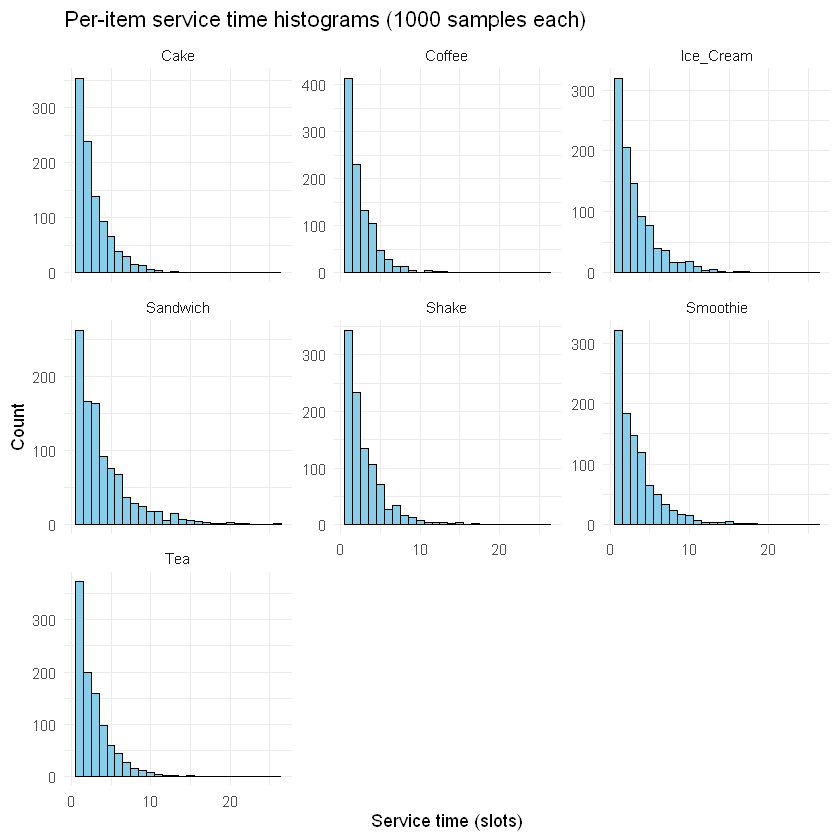

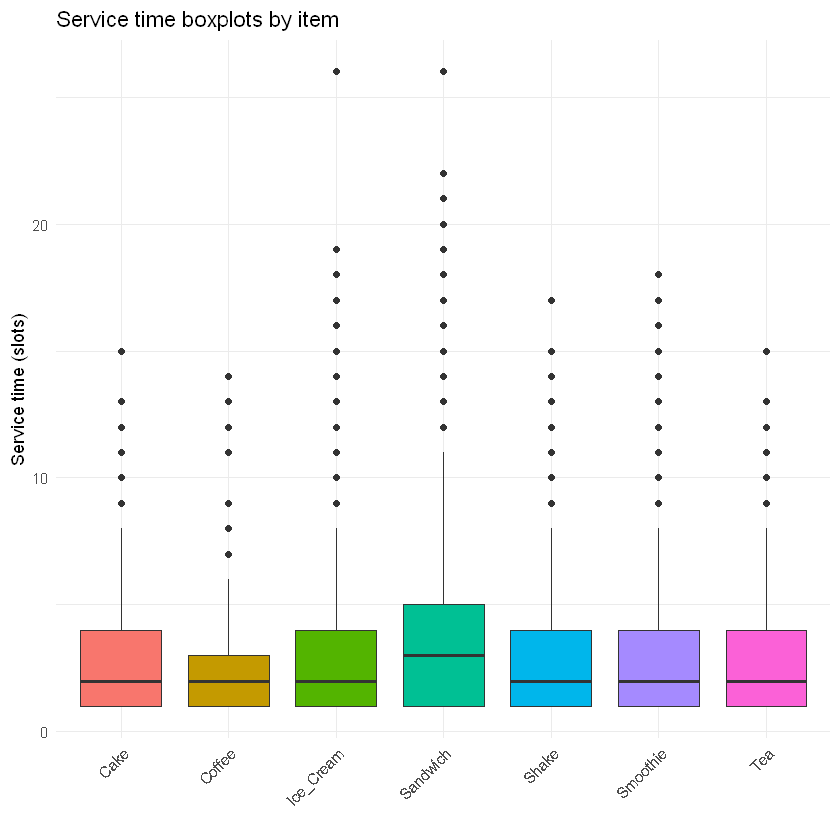

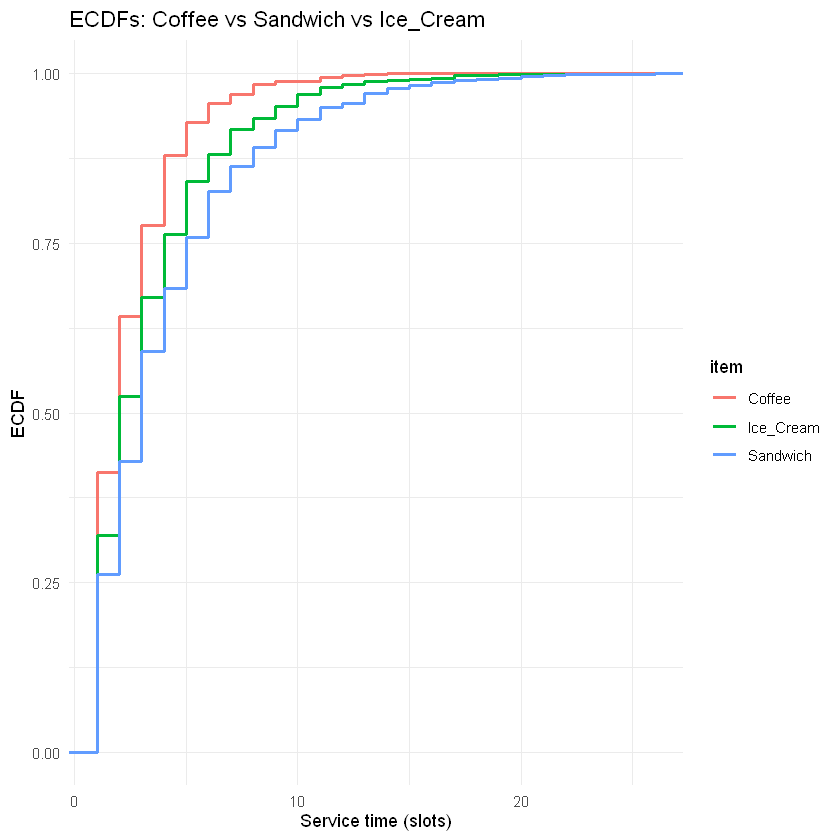

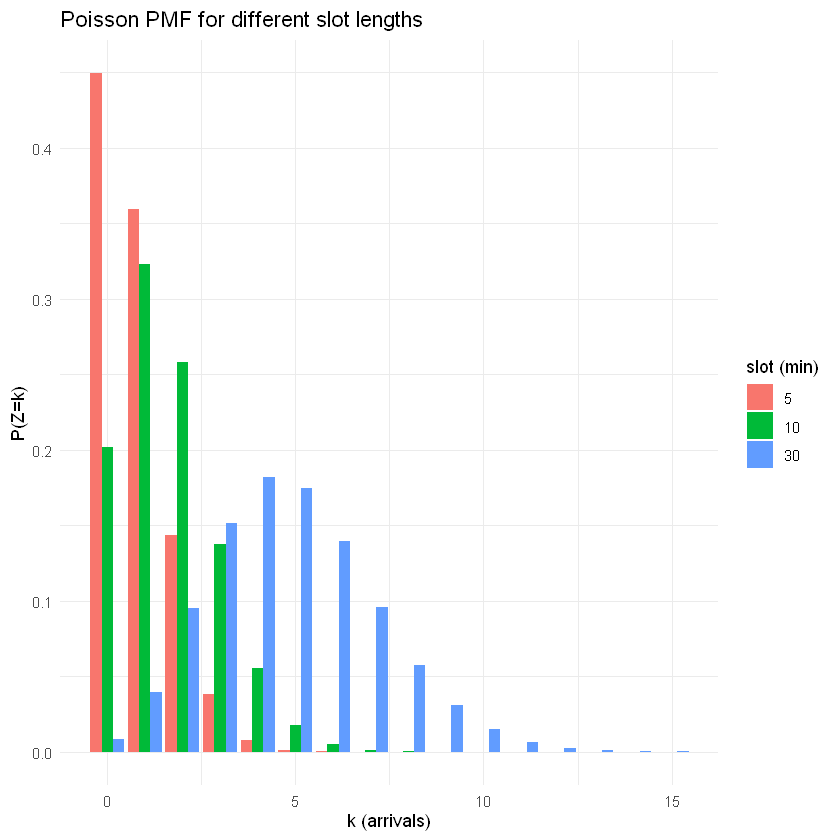

In [12]:
# Phase 2 implementation

set.seed(2025)
N <- 2000

# 1) Poisson samples
# pois_sample <- ## TODO
pois_sample <- rpois(N, lambda_base)

cat("Poisson sample: mean =", round(mean(pois_sample),4), " var =", round(var(pois_sample),4), "\n\n")

# 2) Item samples
items_sample <- sample(menu_names, size = N, replace = TRUE, prob = menu_q)
item_counts <- table(factor(items_sample, levels = menu_names))
kable(data.frame(Item = names(item_counts), Count = as.integer(item_counts), Proportion = round(as.numeric(item_counts)/N,4)),
      caption = paste0("Empirical item selection (N=", N, ")"))

# 3) Per-item geometric samples (1000 each)
samples_per_item <- 1000
service_samples <- lapply(menu_p, function(pp) rgeom(samples_per_item, prob = pp) + 1)
names(service_samples) <- names(menu_p)

# Prepare data frame for plotting
service_df <- data.frame(time = unlist(service_samples), item = rep(names(menu_p), each = samples_per_item))

# Histograms: facet by item
ggplot(service_df, aes(x = time)) +
  geom_histogram(binwidth = 1, boundary = 0.5, color = "black", fill = "skyblue") +
  facet_wrap(~item, scales = "free_y") +
  labs(title = "Per-item service time histograms (1000 samples each)", x = "Service time (slots)", y = "Count") +
  theme_minimal()

# Boxplots of service times
ggplot(service_df, aes(x = item, y = time, fill = item)) +
  geom_boxplot() + labs(title = "Service time boxplots by item", x = "", y = "Service time (slots)") +
  theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + guides(fill = FALSE)

# ECDF overlays for Coffee, Sandwich, Dessert
ggplot(filter(service_df, item %in% c("Coffee","Sandwich","Ice_Cream")), aes(x = time, color = item)) +
  stat_ecdf(size = 1) +
  labs(title = "ECDFs: Coffee vs Sandwich vs Ice_Cream", x = "Service time (slots)", y = "ECDF") +
  theme_minimal()

# 4) Poisson PMF for slot lengths (5,10,30 minutes)
slot_minutes <- c(5,10,30)
lambda_slots <- lambda_base * (slot_minutes / 5)
k_max <- 0:15
poisson_pmf_df <- data.frame()
for (i in seq_along(slot_minutes)) {
  ## TODO
  pmf <- dpois(k_max, lambda_slots[i])
  df_temp <- data.frame(k = k_max, pmf = pmf, slot = slot_minutes[i])
  poisson_pmf_df <- rbind(poisson_pmf_df, df_temp)
}
ggplot(poisson_pmf_df, aes(x = k, y = pmf, fill = factor(slot))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Poisson PMF for different slot lengths", x = "k (arrivals)", y = "P(Z=k)", fill = "slot (min)") +
  theme_minimal()


## Theoretical Discussion - Phase 2
> Answer theorical questions

-----------

## Phase 3 — Per-item analytic quantities and bottleneck identification

**Tasks (Phase 3):**

1. Compute $E[T_i]$ and $\operatorname{Var}(T_i)$ for each menu item (use $E[T] = 1/p$, $\operatorname{Var}(T) = (1-p)/p^2$).  
2. Plot expected service time per item.  
3. Identify bottleneck items by $E[T_i]$ and $\operatorname{Var}(T_i)$.
4. Describe the geometric service-time model as a special case of the **negative binomial distribution**, where the random variable $T_i$ represents the number of service attempts until the first success.



Table: Menu: q, p, E[T], Var[T]

|Item      |    q|    p|      E_T|     Var_T|
|:---------|----:|----:|--------:|---------:|
|Coffee    | 0.25| 0.40| 2.500000|  3.750000|
|Cake      | 0.15| 0.35| 2.857143|  5.306122|
|Smoothie  | 0.15| 0.30| 3.333333|  7.777778|
|Shake     | 0.10| 0.35| 2.857143|  5.306122|
|Sandwich  | 0.10| 0.25| 4.000000| 12.000000|
|Tea       | 0.15| 0.35| 2.857143|  5.306122|
|Ice_Cream | 0.10| 0.30| 3.333333|  7.777778|

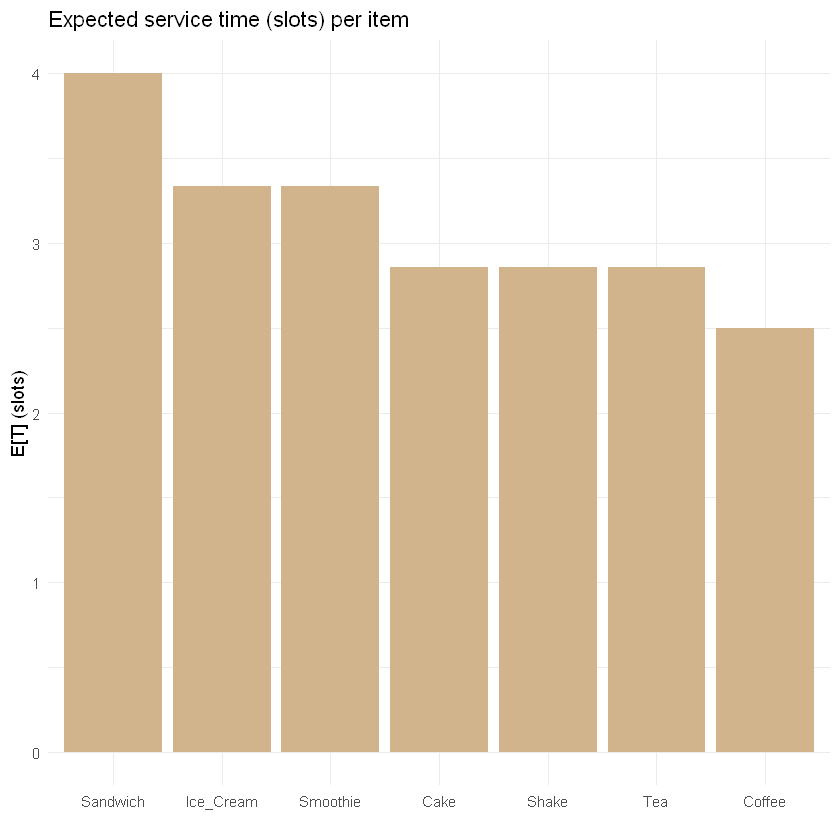

In [13]:
# Phase 3 implementation

# Compute E[T] and Var[T]
menu_df <- data.frame(Item = names(menu_p), q = as.numeric(menu_q), p = as.numeric(menu_p), stringsAsFactors = FALSE)
# menu_df$E_T <- ## TODO
menu_df$E_T <- 1 / menu_df$p

# menu_df$Var_T <- ## TODO
menu_df$Var_T <- (1 - menu_df$p) / menu_df$p^2

kable(menu_df, caption = "Menu: q, p, E[T], Var[T]")

# Barplot of expected times
ggplot(menu_df, aes(x = reorder(Item, -E_T), y = E_T)) +
  geom_bar(stat = "identity", fill = "tan") +
  labs(title = "Expected service time (slots) per item", x = "", y = "E[T] (slots)") +
  theme_minimal()


## Theoretical Discussion - Phase 3

> Answer theorical questions


--------

## Phase 4 — Detailed (item-aware) FIFO queue simulation

### Objectives
In this phase, we extend the discrete-time queue model to include **item-level details** and analyze system behavior under different arrival rates.  
Customers arrive according to a Poisson($\lambda$) process per slot. Each new arrival selects one menu item based on categorical probabilities $q_i$.  

Each ordered item requires a random geometric number of slots $T_i \sim \text{Geom}(p_i)$ to complete service (where $p_i$ is the per-slot success probability).  
During each slot:
- Two base servers are always active.
- A third server is **activated dynamically** when the queue length before service exceeds a threshold $h$ beyond the base servers:  
  $$
  s_t =
  \begin{cases}
  2, & \text{if } Q_{t-1} - 2 < h,\\
  3, & \text{otherwise.}
  \end{cases}
  $$

Each active server attempts to serve the *front* customer using one Bernoulli trial with the relevant $p_i$.  
If successful, the front item departs (service completed). If unsuccessful, the customer remains for the next slot (other servers may still attempt it within the same slot).

We’ll simulate three different load scenarios:

| Scenario | $\lambda$ | Description |
|-----------|------------|-------------|
| Low Load | 0.4 | Sparse arrivals, queue often empty |
| Base Load | 0.8 | Moderate flow, queue stabilized |
| High Load | 1.5 | Heavy traffic, possible buildup |

### Required Outputs
For each scenario:
1. **Time series of $Q_t$** (queue length over time).  
2. **Empirical PMF of $Q$**, i.e. the long-run probability that queue length equals $k$.  
3. **Stacked area plot of composition (first 400 slots)** — showing how many of each item type exist in the queue at each time.  
   - This gives insight into *which menu items* dominate waiting times.
4. **Summary metrics:**
   - $\mathbb{E}[Q]$, $\operatorname{Var}(Q)$, $P(Q=0)$, $P(\text{third active})$


In [19]:
# Phase 4 implementation

# Ensure required packages are available
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)

# Function for detailed queue simulation
simulate_cafe_detailed <- function(lambda,
                                   num_slots = 2000,
                                   menu_q_in,
                                   menu_p_in,
                                   base_servers = 2,
                                   activation_threshold = 4,
                                   verbose = FALSE) {
  if (is.null(names(menu_q_in)) || is.null(names(menu_p_in))) {
    stop("menu_q_in and menu_p_in must be named vectors with identical names.")
  }

  item_names <- names(menu_q_in)
  n_items <- length(item_names)

  Q <- integer(num_slots + 1)
  queue_list <- vector("list", num_slots + 1)
  queue_list[[1]] <- character(0)
  third_active <- logical(num_slots)
  comp_mat <- matrix(0, nrow = num_slots + 1, ncol = n_items)
  colnames(comp_mat) <- item_names
  remaining <- character(0)
  for (t in 1:num_slots) {
    # --- Arrivals ---
    ## TODO
    arrivals <- rpois(1, lambda)

    if (arrivals > 0) {
      new_items <- sample(item_names, size = arrivals, replace = TRUE, prob = menu_q_in)
      remaining <- c(remaining, new_items)
    }
    # --- Servers ---
    ## TODO

    Q_prev <- length(remaining)
    st <- base_servers + ifelse(pmax(Q_prev - base_servers,0) >= activation_threshold, 1, 0)
    third_active[t] <- (st == 3)
    

    # --- Service attempts ---
    ## TODO
    if (length(remaining) > 0) {
      attempts <- min(st, length(remaining))
      for (s in 1:attempts) {
        item <- remaining[1]
        if (runif(1) < menu_p_in[item]) {
          remaining <- remaining[-1]
        }
      }
    }
    
    # --- update Q, queue_list ---
    ## TODO
    Q[t + 1] <- length(remaining)
    queue_list[[t + 1]] <- remaining
    if (length(remaining) > 0) {
      comp_mat[t + 1, ] <- as.integer(table(factor(remaining, levels = item_names)))
    }
  }

  list(Q = Q,
       queue = queue_list,
       comp = comp_mat,
       third_active = third_active,
       lambda = lambda,
       num_slots = num_slots)
}
activation_threshold <- 4

# ---- Run all three scenarios ----
set.seed(2025)
res_low <- simulate_cafe_detailed(lambda = 0.4, num_slots = 2000,
                                  menu_q_in = menu_q, menu_p_in = menu_p,
                                  base_servers = base_servers,
                                  activation_threshold = activation_threshold)

res_base <- simulate_cafe_detailed(lambda = 0.8, num_slots = 2000,
                                   menu_q_in = menu_q, menu_p_in = menu_p,
                                   base_servers = base_servers,
                                   activation_threshold = activation_threshold)

res_high <- simulate_cafe_detailed(lambda = 1.5, num_slots = 2000,
                                   menu_q_in = menu_q, menu_p_in = menu_p,
                                   base_servers = base_servers,
                                   activation_threshold = activation_threshold)

# ---- Summaries ----
summarize_results <- function(res) {
  Q <- res$Q
  c(mean_Q = mean(Q),
    var_Q = var(Q),
    P_Q0 = mean(Q == 0),
    P_third = mean(res$third_active))
}

summary_table <- rbind(
  Low = summarize_results(res_low),
  Base = summarize_results(res_base),
  High = summarize_results(res_high)
)

round(summary_table, 4)


,mean_Q,var_Q,P_Q0,P_third
Low,1.1799,1.7856,0.3863,0.0140
Base,6.0970,20.4516,0.0435,0.5235
High,515.3678,81430.2846,0.0010,0.9950


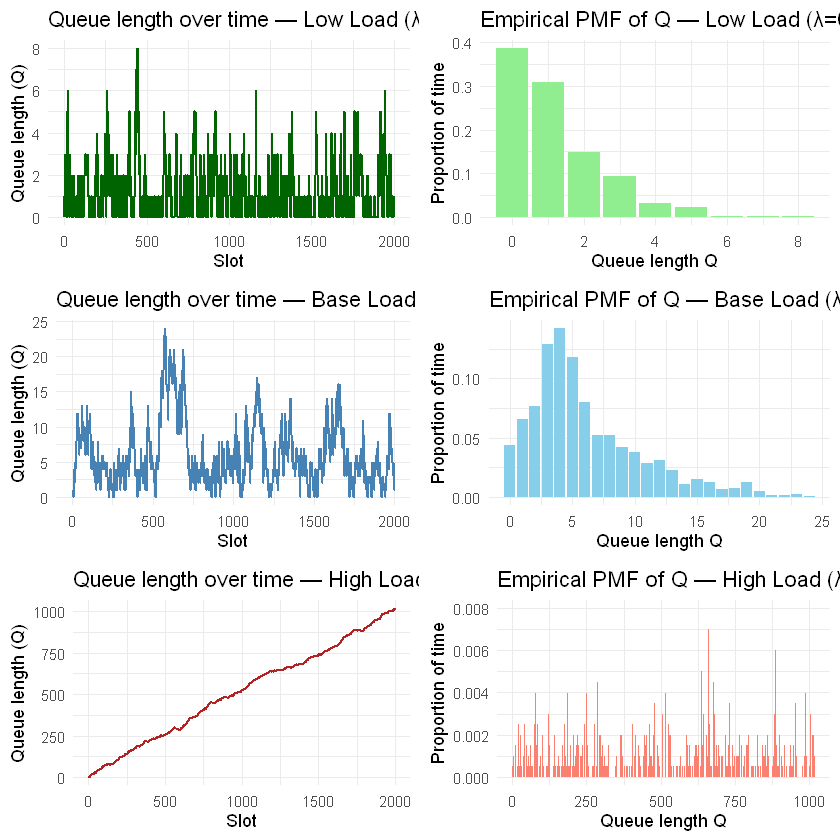

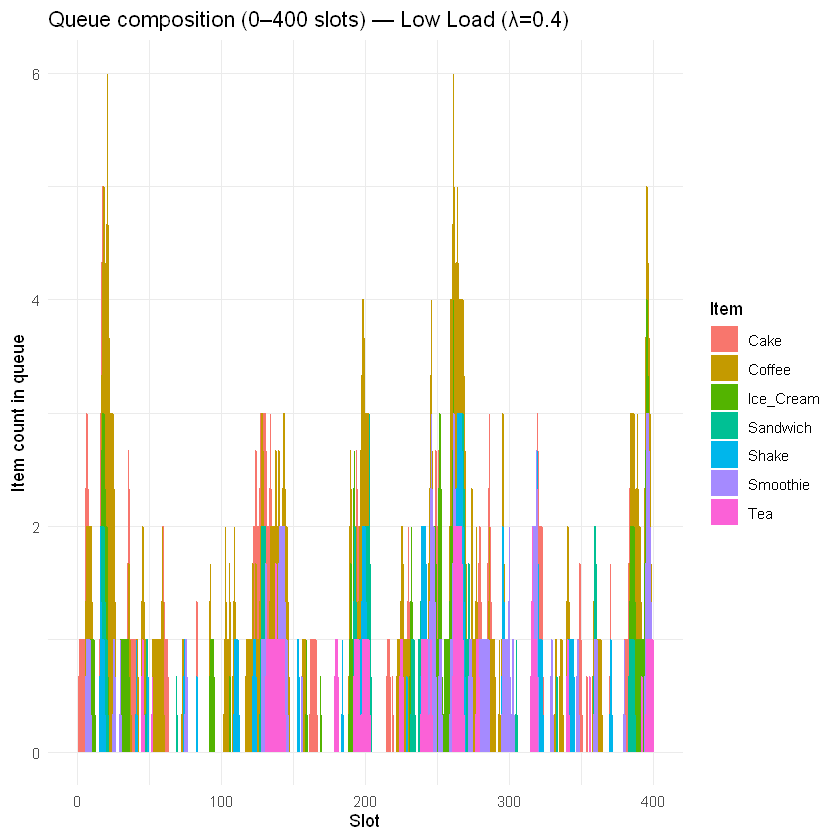

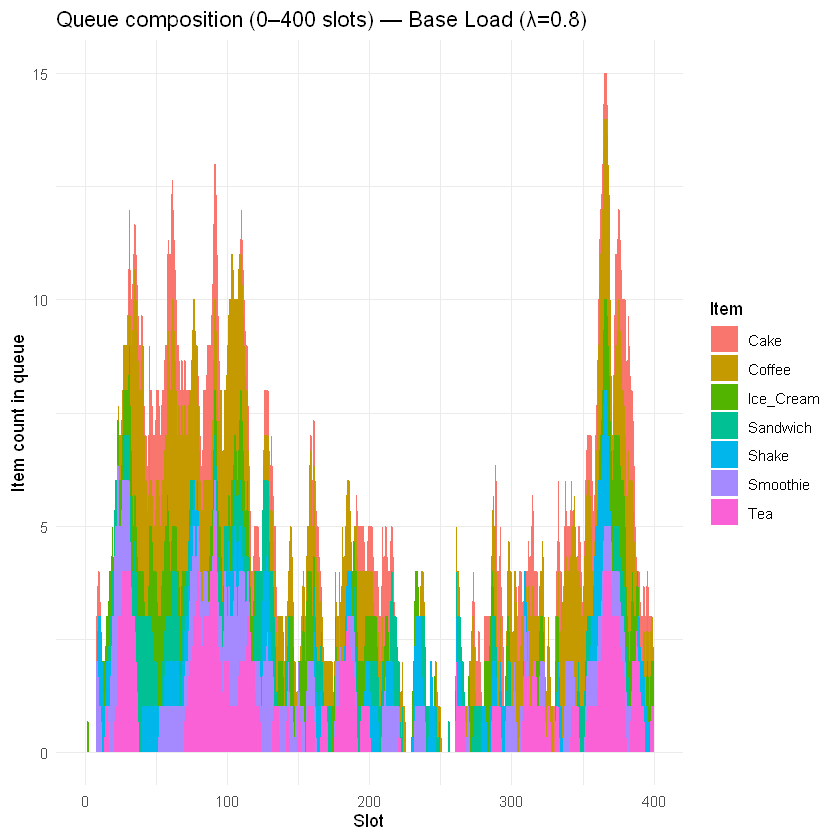

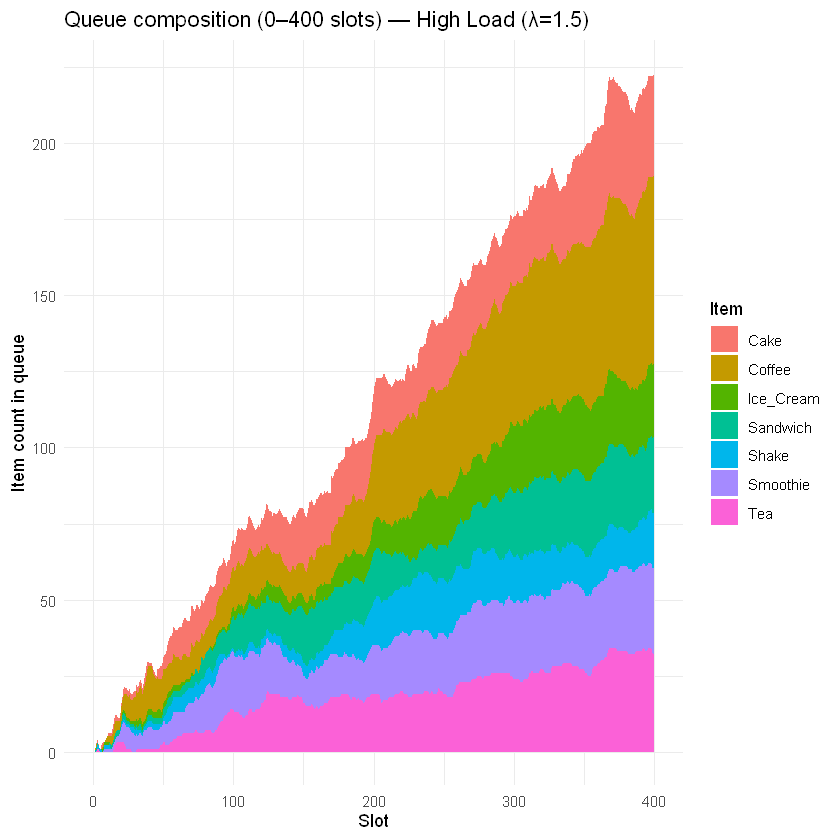

In [20]:
# Visualization and Analysis

plot_Q_series <- function(res, title_label, color = "steelblue") {
  df <- data.frame(slot = 0:res$num_slots, Q = res$Q)
  ggplot(df, aes(x = slot, y = Q)) +
    geom_line(color = color, linewidth = 0.6) +
    labs(title = paste("Queue length over time —", title_label),
         x = "Slot", y = "Queue length (Q)") +
    theme_minimal()
}

plot_Q_pmf <- function(res, title_label, fill_color = "skyblue") {
  df <- data.frame(Q = res$Q)
  pmf <- df %>% count(Q) %>% mutate(prop = n / sum(n))
  ggplot(pmf, aes(x = Q, y = prop)) +
    geom_col(fill = fill_color) +
    labs(title = paste("Empirical PMF of Q —", title_label),
         x = "Queue length Q", y = "Proportion of time") +
    theme_minimal()
}

plot_composition <- function(res, title_label) {
  comp_first <- as.data.frame(res$comp[1:401, , drop = FALSE])
  comp_first$slot <- 0:400
  comp_long <- pivot_longer(comp_first, cols = -slot, names_to = "Item", values_to = "Count")
  ggplot(comp_long, aes(x = slot, y = Count, fill = Item)) +
    geom_area() +
    labs(title = paste("Queue composition (0–400 slots) —", title_label),
         x = "Slot", y = "Item count in queue") +
    theme_minimal()
}

# Generate plots
p_low <- plot_Q_series(res_low, "Low Load (λ=0.4)", "darkgreen")
p_low_pmf <- plot_Q_pmf(res_low, "Low Load (λ=0.4)", "lightgreen")
p_low_comp <- plot_composition(res_low, "Low Load (λ=0.4)")

p_base <- plot_Q_series(res_base, "Base Load (λ=0.8)")
p_base_pmf <- plot_Q_pmf(res_base, "Base Load (λ=0.8)")
p_base_comp <- plot_composition(res_base, "Base Load (λ=0.8)")

p_high <- plot_Q_series(res_high, "High Load (λ=1.5)", "firebrick")
p_high_pmf <- plot_Q_pmf(res_high, "High Load (λ=1.5)", "salmon")
p_high_comp <- plot_composition(res_high, "High Load (λ=1.5)")

# Arrange outputs
grid.arrange(p_low, p_low_pmf, p_base, p_base_pmf, p_high, p_high_pmf, ncol = 2)
print(p_low_comp)
print(p_base_comp)
print(p_high_comp)


### Theoretical Discussion— Phase 4

> Answer theorical questions

-------

## Phase 5 — Sensitivity and Stability Analysis

### Objectives
In this phase, we perform a **systematic sensitivity study** on the arrival rate $\lambda$ to explore the boundaries of stability and system performance.  
Using the detailed FIFO queue simulator from Phase 4, we vary $\lambda$ across a broad range and measure how the queue behaves statistically.

Specifically, we want to: (In this phase set $λ$ up to 1.5)

1. Identify the **stability region**, i.e. where queue length remains bounded.  
2. Quantify how key metrics evolve:
   - $\mathbb{E}[Q]$: Expected queue length.
   - $\operatorname{Var}(Q)$: Queue length variability.
   - $P(Q=0)$: Idle probability (system empty).
   - $P(\text{third active})$: Fraction of time when the auxiliary server is active.
3. Visualize these quantities and locate the **critical point** $\lambda_{\text{stab}}$ where stability breaks down.


### Stability Criterion
The system is deemed *stable* when the mean queue size stays below **80% of maximum service capacity**:
$$
\mathbb{E}[Q] < 0.8 \times s_{\max} = 2.4,
$$
where $s_{\max} = 3$ is the maximum number of active servers.


In [21]:
# Phase 5 implementation

# ---- SETTINGS ----
lambda_grid <- seq(0.2, 1.5, by = 0.1)
num_slots   <- 2000
base_servers_default <- 2
activation_threshold_default <- 4
stability_threshold <- 0.8 * 3  # 2.4

# Check simulate_queue exists
if (!exists("simulate_queue") && !exists("simulate_cafe_detailed")) {
  stop("No simulate_queue or simulate_cafe_detailed function found in the workspace. Please run Phase 4 code first.")
}

# Choose the function available
sim_fun <- if (exists("simulate_queue")) get("simulate_queue") else get("simulate_cafe_detailed")

# Inspect its formal argument names and prepare mapping
sim_formals <- names(formals(sim_fun))

# Build args list using names present in the function
build_sim_args <- function(lambda_val, num_slots_val, menu_q_val, menu_p_val,
                           base_servers_val, activation_threshold_val) {
  args <- list()
  # possible names we want to set (common variants)
  wanted <- list(
    lambda = lambda_val, lambda_in = lambda_val, lambda_val = lambda_val,
    num_slots = num_slots_val, num_slots_in = num_slots_val, n = num_slots_val,
    menu_q = menu_q_val, menu_q_in = menu_q_val, menu_qs = menu_q_val,
    menu_p = menu_p_val, menu_p_in = menu_p_val, menu_ps = menu_p_val,
    base_servers = base_servers_val, base_servers_in = base_servers_val,
    activation_threshold = activation_threshold_val, activation_threshold_in = activation_threshold_val,
    h = activation_threshold_val, threshold_h = activation_threshold_val, thr = activation_threshold_val
  )
  for (nm in names(wanted)) {
    if (nm %in% sim_formals) args[[nm]] <- wanted[[nm]]
  }
  args
}

# If build_sim_args returns an empty list, we'll attempt a fallback positional call:
can_call_by_name <- length(build_sim_args(0.2, num_slots, menu_q, menu_p, base_servers_default, activation_threshold_default)) > 0

# Storage
results <- data.frame(lambda = lambda_grid,
                      mean_Q = NA_real_, var_Q = NA_real_,
                      P_Q0 = NA_real_, P_third = NA_real_, stringsAsFactors = FALSE)

# Simulation runner that uses do.call with the discovered argument names
run_sim <- function(lambda_val) {
  args <- build_sim_args(lambda_val, num_slots, menu_q, menu_p,
                         base_servers_default, activation_threshold_default)
  # If no named args matched, try a positional call with a few common signatures
  if (length(args) == 0) {
    # We'll attempt option 1 then 2; use tryCatch to return informative errors.
    try_pos1 <- try(do.call(sim_fun, list(lambda, num_slots, menu_q, menu_p, base_servers_default, activation_threshold_default)), silent = TRUE)
    if (!inherits(try_pos1, "try-error")) return(try_pos1)
    try_pos2 <- try(do.call(sim_fun, list(lambda, menu_q, menu_p, num_slots, base_servers_default, activation_threshold_default)), silent = TRUE)
    if (!inherits(try_pos2, "try-error")) return(try_pos2)
    stop("Unable to call the simulator: it has an unexpected signature. Inspect formals(simulate_queue).")
  } else {
    # call by name
    out <- try(do.call(sim_fun, args = args), silent = TRUE)
    if (inherits(out, "try-error")) {
      stop("Simulator call failed when called with matched argument names: ", out)
    }
    return(out)
  }
}


for (i in seq_along(lambda_grid)) {
  # lam <- ## TODO
  lam <- lambda_grid[i]
  # sim_out ## TODO
  sim_out <- run_sim(lam)
  Q_series <- NULL
  Q_candidates <- c("Q", "queue", "queue_length", "Q_series")
  # Try to find Q series and third_active logically.
  if (is.list(sim_out)) {
    # heuristics to find Q vector:
    ## TODO
    for (nm in Q_candidates) {
      ## TODO
      if (nm %in% names(sim_out)) {
        Q_series <- sim_out[[nm]]
        break
      }
    }
    # if not found, check if sim_out is data.frame with Q column or numeric vector
    if (is.null(Q_series)) {
       ## TODO
      if (is.data.frame(sim_out) && "Q" %in% colnames(sim_out)) Q_series <- sim_out$Q
      else if (is.numeric(sim_out) && length(sim_out) > 1) Q_series <- sim_out
    }
    # third active
    third_candidates <- c("third_active", "third", "thirdActive", "thirdActiveFlag")
    third_active <- NULL
    for (nm in third_candidates) {
      ## TODO
      if (nm %in% names(sim_out)) {
        third_active <- sim_out[[nm]]
        break
      }
    }
    # fallback: if sim_out$data.frame exists with column 'third' or 'third_active'
    if (is.null(third_active) && is.data.frame(sim_out)) {
      ## TODO
      if ("third_active" %in% colnames(sim_out)) third_active <- sim_out$third_active
      else if ("third" %in% colnames(sim_out)) third_active <- sim_out$third ## TODO
    }
  } else if (is.numeric(sim_out)) {
      ## TODO
      Q_series <- sim_out
      third_active <- rep(FALSE, length(Q_series))
  } else {
    stop("Unexpected simulator output type; expected list/data.frame/numeric vector.")
  }

  if (is.null(Q_series)) stop("Could not locate queue length series in simulator output for λ = ", lam)
  if (is.null(third_active)) third_active <- rep(FALSE, length(Q_series))

  # Normalize types
  Q_series <- as.numeric(Q_series)
  third_active <- as.logical(third_active)
  # compute metrics
  results$mean_Q[i] <- mean(Q_series, na.rm = TRUE)
  results$var_Q[i]  <- var(Q_series, na.rm = TRUE)
  results$P_Q0[i]   <- mean(Q_series == 0, na.rm = TRUE)
  results$P_third[i] <- mean(third_active, na.rm = TRUE)

  cat(sprintf("λ = %.1f | E[Q]=%.3f | Var(Q)=%.3f | P(Q=0)=%.3f | P(third)=%.3f\n",
              lam, results$mean_Q[i], results$var_Q[i], results$P_Q0[i], results$P_third[i]))
}

# Stability label and lambda_stab
# results$Stable <- ## TODO
results$Stable <- ifelse(results$mean_Q < stability_threshold, "Stable", "Unstable")

lambda_stab <- if (any(results$Stable == "Unstable")) min(results$lambda[results$Stable == "Unstable"]) else NA_real_


λ = 0.2 | E[Q]=0.394 | Var(Q)=0.462 | P(Q=0)=0.695 | P(third)=0.000
λ = 0.3 | E[Q]=0.788 | Var(Q)=1.009 | P(Q=0)=0.501 | P(third)=0.004
λ = 0.4 | E[Q]=1.229 | Var(Q)=1.777 | P(Q=0)=0.365 | P(third)=0.015
λ = 0.5 | E[Q]=1.683 | Var(Q)=3.048 | P(Q=0)=0.310 | P(third)=0.066
λ = 0.6 | E[Q]=2.647 | Var(Q)=5.598 | P(Q=0)=0.181 | P(third)=0.160
λ = 0.7 | E[Q]=3.795 | Var(Q)=8.524 | P(Q=0)=0.098 | P(third)=0.300
λ = 0.8 | E[Q]=5.361 | Var(Q)=22.455 | P(Q=0)=0.052 | P(third)=0.441
λ = 0.9 | E[Q]=10.109 | Var(Q)=43.290 | P(Q=0)=0.008 | P(third)=0.797
λ = 1.0 | E[Q]=86.835 | Var(Q)=1528.788 | P(Q=0)=0.001 | P(third)=0.996
λ = 1.1 | E[Q]=116.862 | Var(Q)=1430.129 | P(Q=0)=0.000 | P(third)=0.998
λ = 1.2 | E[Q]=136.777 | Var(Q)=8785.677 | P(Q=0)=0.000 | P(third)=0.995
λ = 1.3 | E[Q]=322.204 | Var(Q)=39319.776 | P(Q=0)=0.000 | P(third)=0.995
λ = 1.4 | E[Q]=438.968 | Var(Q)=66920.636 | P(Q=0)=0.000 | P(third)=0.997
λ = 1.5 | E[Q]=506.404 | Var(Q)=90333.607 | P(Q=0)=0.001 | P(third)=0.996


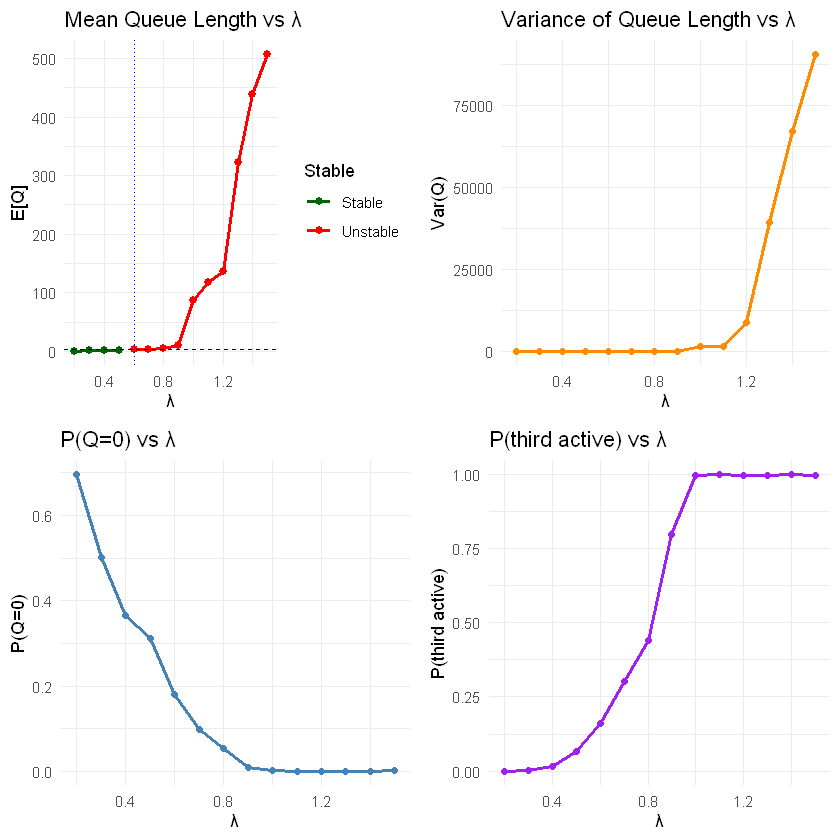


Empirical stability transition at lambda_stab ≈ 0.6 


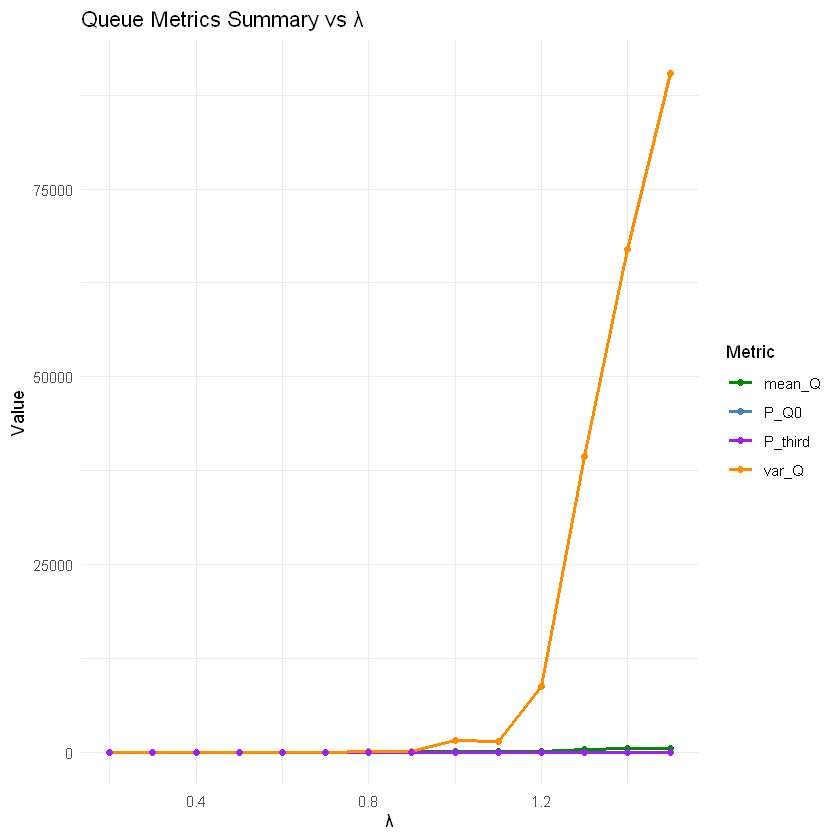

In [22]:
# Visualization and Analysis

library(ggplot2); library(gridExtra); library(tidyr)

p1 <- ggplot(results, aes(lambda, mean_Q, color = Stable)) +
  geom_line(size = 1.1) + geom_point(size = 2) +
  geom_hline(yintercept = stability_threshold, linetype = "dashed") +
  { if (!is.na(lambda_stab)) geom_vline(xintercept = lambda_stab, linetype = "dotted", color = "blue") } +
  scale_color_manual(values = c("Stable" = "darkgreen", "Unstable" = "red")) +
  labs(title = "Mean Queue Length vs λ", y = "E[Q]", x = "λ") +
  theme_minimal()

p2 <- ggplot(results, aes(lambda, var_Q)) +
  geom_line(color = "darkorange", size = 1.1) + geom_point(color = "darkorange") +
  labs(title = "Variance of Queue Length vs λ", y = "Var(Q)", x = "λ") + theme_minimal()

p3 <- ggplot(results, aes(lambda, P_Q0)) +
  geom_line(color = "steelblue", size = 1.1) + geom_point(color = "steelblue") +
  labs(title = "P(Q=0) vs λ", y = "P(Q=0)", x = "λ") + theme_minimal()

p4 <- ggplot(results, aes(lambda, P_third)) +
  geom_line(color = "purple", size = 1.1) + geom_point(color = "purple") +
  labs(title = "P(third active) vs λ", y = "P(third active)", x = "λ") + theme_minimal()

grid.arrange(p1, p2, p3, p4, ncol = 2)

results_long <- pivot_longer(results, cols = c(mean_Q, var_Q, P_Q0, P_third),
                             names_to = "Metric", values_to = "Value")
ggplot(results_long, aes(lambda, Value, color = Metric)) +
  geom_line(size = 1.1) + geom_point() +
  scale_color_manual(values = c("mean_Q" = "green4", "var_Q" = "darkorange",
                                "P_Q0" = "steelblue", "P_third" = "purple")) +
  labs(title = "Queue Metrics Summary vs λ", x = "λ", y = "Value") +
  theme_minimal()


# Print lambda_stab message
if (!is.na(lambda_stab)) {
  cat("\nEmpirical stability transition at lambda_stab ≈", lambda_stab, "\n")
} else {
  cat("\nNo instability observed in the scanned λ grid (lambda_stab = NA)\n")
}


### Theoretical Discussion — Phase 5

> Answer theorical questions

-----

## Phase 6 — Sensitivity to Dynamic Activation Threshold $h$

### Objectives

In this phase, we explore how the **dynamic server activation threshold** $h$ affects queue stability and performance.  
Recall that the third server activates when $Q_{t-1} - 2 \ge h$.  
A small $h$ means the third server helps earlier, improving stability but increasing resource usage;  
a large $h$ delays activation, saving resources but risking congestion.

We fix:
- Arrival rate: λ = 0.8
- Base servers = 2
- Simulation length: 2000 slots

We sweep $h$ from 1 to 8 and compute:
- Mean queue length $E[Q]$
- Variance of queue length $Var(Q)$
- Probability of empty system $P(Q=0)$
- Probability third server active $P(\text{third active})$
- **Stability indicator** (stable if $E[Q] < 2.4$)


In [24]:
# Phase 6 implementation

h_grid <- 1:8
lambda_val <- 0.8
num_slots <- 2000
base_servers <- 2

results_h <- data.frame(h = h_grid,
                        mean_Q = NA_real_,
                        var_Q = NA_real_,
                        P_Q0 = NA_real_,
                        P_third = NA_real_,
                        stringsAsFactors = FALSE)


simulate_queue <- function(lambda, num_slots, base_servers = 2, h = 4,
                           menu_q, menu_p) {
  # ---- Initialization ----
  Q_series <- numeric(num_slots)
  third_active <- logical(num_slots)
  queue <- character(0)

  for (t in 1:num_slots) {
    arrivals <- rpois(1, lambda)
    if (arrivals > 0) {
      new_items <- sample(names(menu_q), arrivals, TRUE, menu_q)
      queue <- c(queue, new_items)
    }

    # --- Dynamic server activation ---
    active_servers <- ifelse(length(queue) - base_servers >= h, 3, 2)
    third_active[t] <- (active_servers == 3)

    # --- Service step ---
    served <- 0
    if (length(queue) > 0) {
      for (s in 1:active_servers) {
        if (length(queue) == 0) break
        item <- queue[1]
        if (runif(1) < menu_p[item]) {
          queue <- queue[-1]
          served <- served + 1
        } else {
          queue <- c(queue[-1], item)
        }
      }
    }
    Q_series[t] <- length(queue)
  }

  list(Q_series = Q_series, third_active = third_active)
}


# Run simulations for each h
for (i in seq_along(h_grid)) {
  h_val <- h_grid[i]
  sim_out <- simulate_queue(lambda = lambda_val,
                            num_slots = num_slots,
                            base_servers = base_servers,
                            h = h_val,
                            menu_q = menu_q,
                            menu_p = menu_p)

  Q_series <- sim_out$Q_series
  results_h$mean_Q[i] <- mean(Q_series)
  results_h$var_Q[i] <- var(Q_series)
  results_h$P_Q0[i] <- mean(Q_series == 0)
  results_h$P_third[i] <- mean(sim_out$third_active)

  cat(sprintf("h=%d | E[Q]=%.3f | Var(Q)=%.3f | P(Q=0)=%.3f | P(third)=%.3f\n",
              h_val, results_h$mean_Q[i], results_h$var_Q[i],
              results_h$P_Q0[i], results_h$P_third[i]))
}

results_h$Stable <- ifelse(results_h$mean_Q < 2.4, "Stable", "Unstable")


h=1 | E[Q]=2.871 | Var(Q)=10.651 | P(Q=0)=0.226 | P(third)=0.544
h=2 | E[Q]=2.846 | Var(Q)=5.184 | P(Q=0)=0.173 | P(third)=0.479
h=3 | E[Q]=3.643 | Var(Q)=8.073 | P(Q=0)=0.133 | P(third)=0.423
h=4 | E[Q]=5.221 | Var(Q)=12.779 | P(Q=0)=0.061 | P(third)=0.480
h=5 | E[Q]=6.153 | Var(Q)=21.367 | P(Q=0)=0.064 | P(third)=0.453
h=6 | E[Q]=8.520 | Var(Q)=33.181 | P(Q=0)=0.039 | P(third)=0.556
h=7 | E[Q]=8.785 | Var(Q)=46.356 | P(Q=0)=0.045 | P(third)=0.476
h=8 | E[Q]=8.530 | Var(Q)=29.516 | P(Q=0)=0.050 | P(third)=0.429


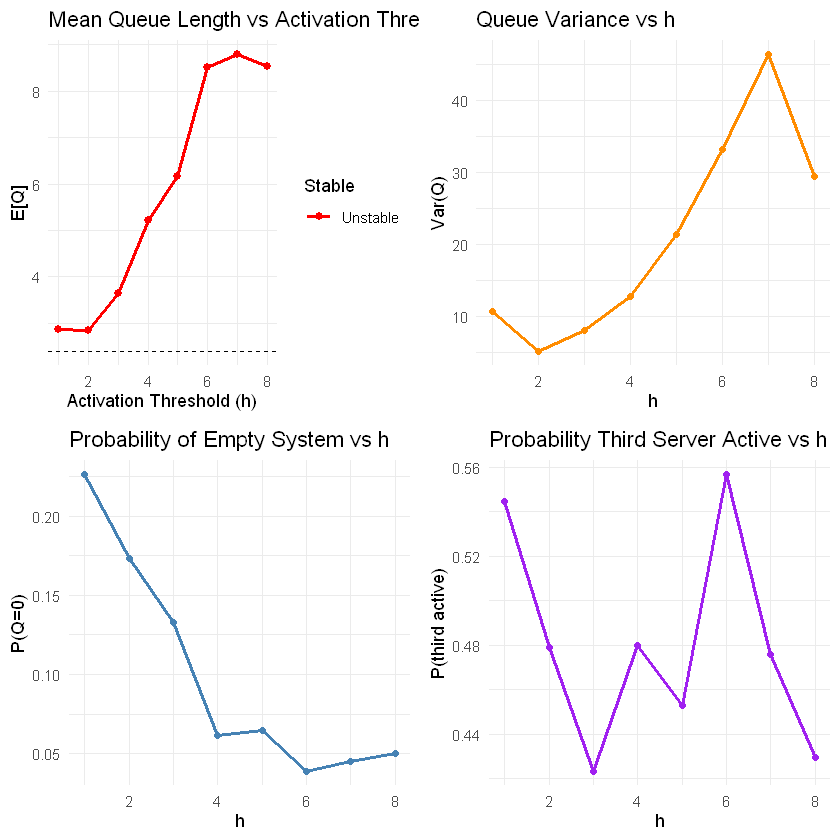

In [25]:
# Visualization and Analysis

library(ggplot2)
library(gridExtra)
library(tidyr)

p1 <- ggplot(results_h, aes(h, mean_Q, color = Stable)) +
  geom_line(size=1.1) + geom_point(size=2) +
  geom_hline(yintercept=2.4, linetype="dashed") +
  labs(title="Mean Queue Length vs Activation Threshold h",
       x="Activation Threshold (h)", y="E[Q]") +
  scale_color_manual(values=c("Stable"="darkgreen","Unstable"="red")) +
  theme_minimal()

p2 <- ggplot(results_h, aes(h, var_Q)) +
  geom_line(color="darkorange", size=1.1) + geom_point(color="darkorange") +
  labs(title="Queue Variance vs h", x="h", y="Var(Q)") +
  theme_minimal()

p3 <- ggplot(results_h, aes(h, P_Q0)) +
  geom_line(color="steelblue", size=1.1) + geom_point(color="steelblue") +
  labs(title="Probability of Empty System vs h", x="h", y="P(Q=0)") +
  theme_minimal()

p4 <- ggplot(results_h, aes(h, P_third)) +
  geom_line(color="purple", size=1.1) + geom_point(color="purple") +
  labs(title="Probability Third Server Active vs h", x="h", y="P(third active)") +
  theme_minimal()

grid.arrange(p1,p2,p3,p4,ncol=2)

### Theoretical Discussion — Phase 6

> Answer theorical questions

-------


## Phase 7 — Joint Sensitivity Analysis on \(\lambda\) and \(h\)

### Objectives
In this final phase, we analyze the **joint effect** of arrival rate \(\lambda\) and activation threshold \(h\) on system stability.  
This phase produces a **2D stability map** indicating regions where the queue remains under control.

### Setup
- λ ∈ {0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4}  
- h ∈ {1, 2, 3, 4, 5, 6, 7, 8}  
- Each combination simulated for 1000 slots.  
- Compute: \(E[Q]\), \(Var(Q)\), and stability indicator (stable if \(E[Q] < 2.4\)).


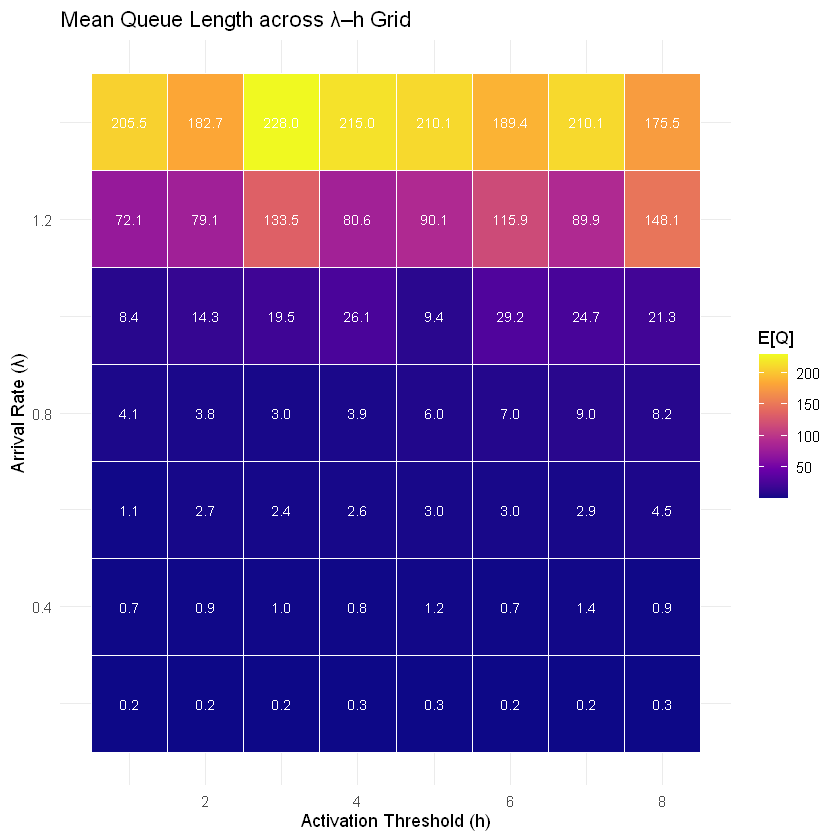

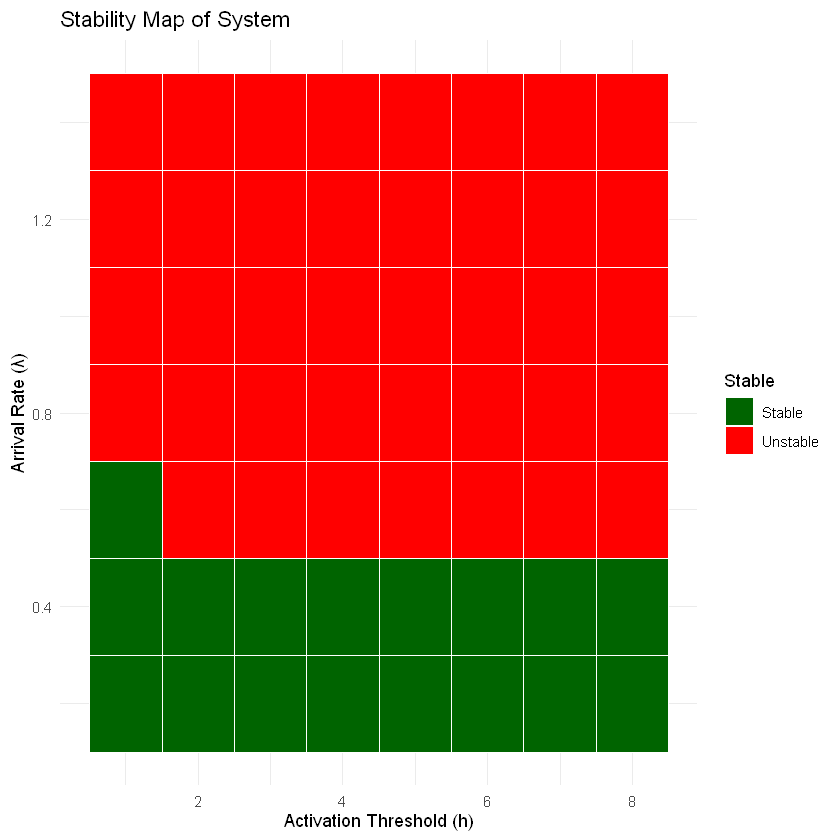

In [26]:
# Phase 7 implementation

lambda_grid <- seq(0.2, 1.4, by = 0.2)
h_grid <- 1:8
num_slots <- 1000
base_servers <- 2

results_2D <- expand.grid(lambda = lambda_grid, h = h_grid)
results_2D$mean_Q <- NA_real_
results_2D$Stable <- NA_character_

for (i in seq_len(nrow(results_2D))) {
  lam <- results_2D$lambda[i]
  h_val <- results_2D$h[i]
  sim_out <- simulate_queue(lambda = lam,
                            num_slots = num_slots,
                            base_servers = base_servers,
                            h = h_val,
                            menu_q = menu_q,
                            menu_p = menu_p)

  Q_series <- sim_out$Q_series
  results_2D$mean_Q[i] <- mean(Q_series)
  results_2D$Stable[i] <- ifelse(mean(Q_series) < 2.4, "Stable", "Unstable")
}

library(ggplot2)

ggplot(results_2D, aes(x = h, y = lambda, fill = mean_Q)) +
  geom_tile(color="white") +
  scale_fill_viridis_c(option="plasma") +
  geom_text(aes(label = sprintf("%.1f", mean_Q)), color="white", size=3) +
  labs(title = "Mean Queue Length across λ–h Grid",
       x = "Activation Threshold (h)", y = "Arrival Rate (λ)",
       fill = "E[Q]") +
  theme_minimal()

ggplot(results_2D, aes(x = h, y = lambda, fill = Stable)) +
  geom_tile(color="white") +
  scale_fill_manual(values=c("Stable"="darkgreen","Unstable"="red")) +
  labs(title = "Stability Map of System",
       x = "Activation Threshold (h)", y = "Arrival Rate (λ)") +
  theme_minimal()


### Theoretical Discussion — Phase 7
> Answer theorical questions

---------